In [1]:
import glob

In [2]:
imgfiles = [f for f in glob.glob("./data/*.jpeg")]

In [4]:
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
from tqdm.notebook import tqdm

In [15]:
X = []
Y = []
for imgfile in tqdm(imgfiles):
    image = mpimg.imread(imgfile)
    image_resized = resize(image, (150, 150),
                       anti_aliasing=True)
    X.append(list(np.resize(image_resized,(150,150,1))))
    if(imgfile[:-5].find("p") != -1):
        Y.append(1)
    if(imgfile[:-5].find("n") != -1):
        Y.append(0)
    

In [19]:
np.shape(X)

(200, 150, 150, 1)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

In [22]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
(X_train.shape)

(160, 150, 150, 1)

In [24]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [25]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 73984)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                4

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Train on 160 samples, validate on 40 samples
Epoch 1/10
160/160 [==============================] - 4s 25ms/sample - loss: 1.1098 - accuracy: 0.4750 - val_loss: 0.6920 - val_accuracy: 0.5000
Epoch 2/10
160/160 [==============================] - 3s 19ms/sample - loss: 0.6903 - accuracy: 0.5500 - val_loss: 0.6687 - val_accuracy: 0.5000
Epoch 3/10
160/160 [==============================] - 3s 18ms/sample - loss: 0.6708 - accuracy: 0.5063 - val_loss: 0.6352 - val_accuracy: 0.6000
Epoch 4/10
160/160 [==============================] - 3s 19ms/sample - loss: 0.6053 - accuracy: 0.7312 - val_loss: 0.5482 - val_accuracy: 0.8000
Epoch 5/10
160/160 [==============================] - 3s 20ms/sample - loss: 0.4763 - accuracy: 0.8938 - val_loss: 0.3912 - val_accuracy: 0.8250
Epoch 6/10
160/160 [==============================] - 4s 23ms/sample - loss: 0.3378 - accuracy: 0.8500 - val_loss: 0.2703 - val_accuracy: 0.9000
Epoch 7/10
160/160 [==============================] - 4s 22ms/sample - loss: 0.2212 -

In [29]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

40/40 - 0s - loss: 0.1276 - accuracy: 0.9750


In [30]:
import matplotlib.pyplot as plt

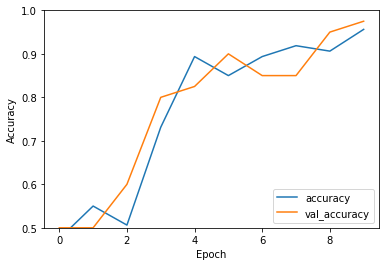

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [32]:
model.save("pnumonia_model.h5")